In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import *
from statsmodels.graphics.tsaplots import *

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
palette = 'deep'
sns.set(font='SimHei', font_scale=1.2, style='whitegrid', palette=palette)  # 解决Seaborn中文显示问题

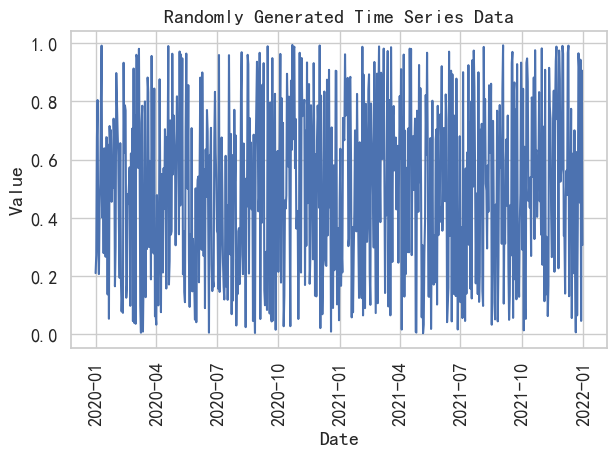

2020-01-01    0.208838
2020-01-02    0.270675
2020-01-03    0.675843
2020-01-04    0.804913
2020-01-05    0.297130
                ...   
2021-12-27    0.451881
2021-12-28    0.943782
2021-12-29    0.044349
2021-12-30    0.906427
2021-12-31    0.305905
Freq: D, Length: 731, dtype: float64

In [34]:
# 测试数据

# 生成时间序列数据
def generate_time_series(start_date, end_date):
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    data = np.random.rand(len(dates))
    return pd.Series(data, index=dates)


# 生成测试数据
start_date = '2020-01-01'
end_date = '2021-12-31'
data = generate_time_series(start_date, end_date)

# 可视化数据
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Randomly Generated Time Series Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

data

# 大纲
进行时间序列预测的先决条件包括以下几点：

1. 时间序列的稳定性：在进行时间序列预测之前，需要先判断时间序列是否是稳定的，即是否满足平稳性条件，例如平均数、方差、自相关函数等都应该保持不变。如果时间序列不稳定，需要进行平稳化处理，例如差分、对数变换等。
2. 数据的连续性和可靠性：时间序列需要是一段连续的时间数据，数据的采集过程需要保证数据的连续性和可靠性。如果数据中存在缺失值或异常值，需要进行填充或处理。
3. 季节性和趋势性：时间序列数据通常包含季节性和趋势性的变化，需要对这些变化进行建模，例如使用ARIMA模型或Prophet模型等。
4. 时间序列的长度和频率：预测的精度受时间序列长度和频率的影响，较长的时间序列和较高的频率通常可以得到更准确的预测结果。因此，在进行时间序列预测之前，需要对时间序列的长度和频率进行适当的选择。
5. 模型的选择和调参：选择合适的时间序列预测模型非常重要，常见的模型包括ARIMA、Prophet、LSTM等。不同的模型适用于不同的数据类型和预测需求。在使用模型进行预测时，还需要进行调参，例如确定滞后期、季节性周期等参数。

需要注意的是，以上条件不是必须满足的，不同的时间序列预测模型可能对条件的要求有所不同。但这些条件可以帮助我们更好地理解时间序列预测的基本原理和限制，从而更好地进行时间序列分析和预测。

# 数据的连续性和可靠性判断

需要预测的时间序列值必须是连续的

# 时间序列的稳定性判断

时间序列的稳定性可以通过多种方式来检测，以下是常见的几种方法：

1. 观察时间序列图：画出时间序列图，观察序列是否有明显的趋势和季节性，以及是否具有随机波动。如果序列具有明显的趋势和季节性，则很可能是非平稳的。
2. 统计量检验：使用ADF检验、KPSS检验等统计检验方法来检测时间序列的平稳性。ADF检验的零假设是时间序列不是平稳的，如果p值小于设定的显著性水平（通常为0.05），则可以拒绝零假设，认为时间序列是平稳的。KPSS检验则是检测时间序列是否具有趋势性，如果检验统计量小于临界值，则可以拒绝零假设，认为时间序列是平稳的。
3. 自相关图和偏自相关图：通过画出自相关图和偏自相关图，观察序列的自相关和偏自相关系数是否随着滞后期的增加而逐渐减小并趋于0，如果序列的自相关系数或偏自相关系数不随着时间的推移而衰减，则表明序列是非平稳的。
4. 滚动统计量：计算滚动平均值、滚动标准差等统计量，并观察它们是否随时间变化而变化。如果滚动统计量的均值和方差在时间上保持不变，则可以认为序列是平稳的。

需要注意的是，以上方法并不是绝对可靠的，不同的方法可能会得出不同的结论。因此，在进行时间序列分析和预测时，建议使用多种方法来检测时间序列的稳定性，以减小误判的风险。

In [50]:
# 使用测试数据测试函数功能
# 需要预测的时间序列值 = data

# 使用真实数据
需要预测的时间序列值 = data

df = pd.read_excel('../原始数据/附件1：物流网络历史货量数据.xlsx')
df = df[(df['场地1'] == 'DC25') & (df['场地2'] == 'DC62')].reset_index(drop=True)
需要预测的时间序列值 = df['货量']
需要预测的时间序列值

0         38
1         54
2          8
3          7
4          6
       ...  
365    14417
366    13787
367     4693
368    13544
369     6320
Name: 货量, Length: 370, dtype: int64

In [51]:
# 单位根检验(ADF)

# 准备时间序列数据
ts = 需要预测的时间序列值

# 将Series对象转换为numpy数组
ts_np = np.array(ts)

# 进行ADF检验
result = adfuller(ts_np)

# 打印检验结果
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -5.320532
p-value: 0.000005
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


In [52]:
# KPSS检验

# 读取时间序列数据
data = 需要预测的时间序列值

# 进行KPSS检验
kpss_test = kpss(data, regression='c', nlags='auto')

# 输出检验结果
print('KPSS检验统计量：', kpss_test[0])
print('p值：', kpss_test[1])
print('滞后期数：', kpss_test[2])

if kpss_test[1] < 0.05:
    print('序列是非平稳的')
else:
    print('序列是平稳的')


KPSS检验统计量： 0.34505581804028396
p值： 0.1
滞后期数： 7
序列是平稳的


D:\Users\win\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


D:\Users\win\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


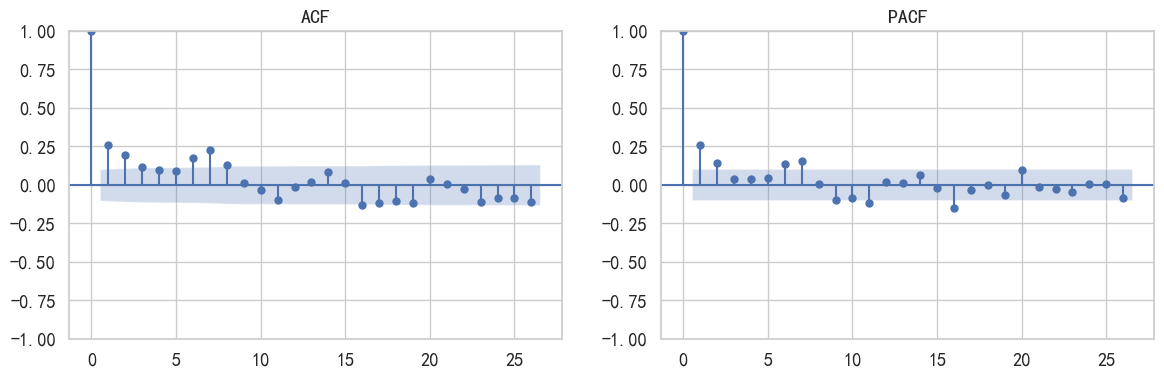

In [53]:
# 自相关图和偏自相关图

# 读取时间序列数据
data = 需要预测的时间序列值

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
# 绘制自相关图
plot_acf(data, ax=ax1, title='ACF')

# 绘制偏自相关图
plot_pacf(data, ax=ax2, title='PACF')
plt.savefig('ACF-PACF-自相关图和偏自相关图.svg')
plt.show()


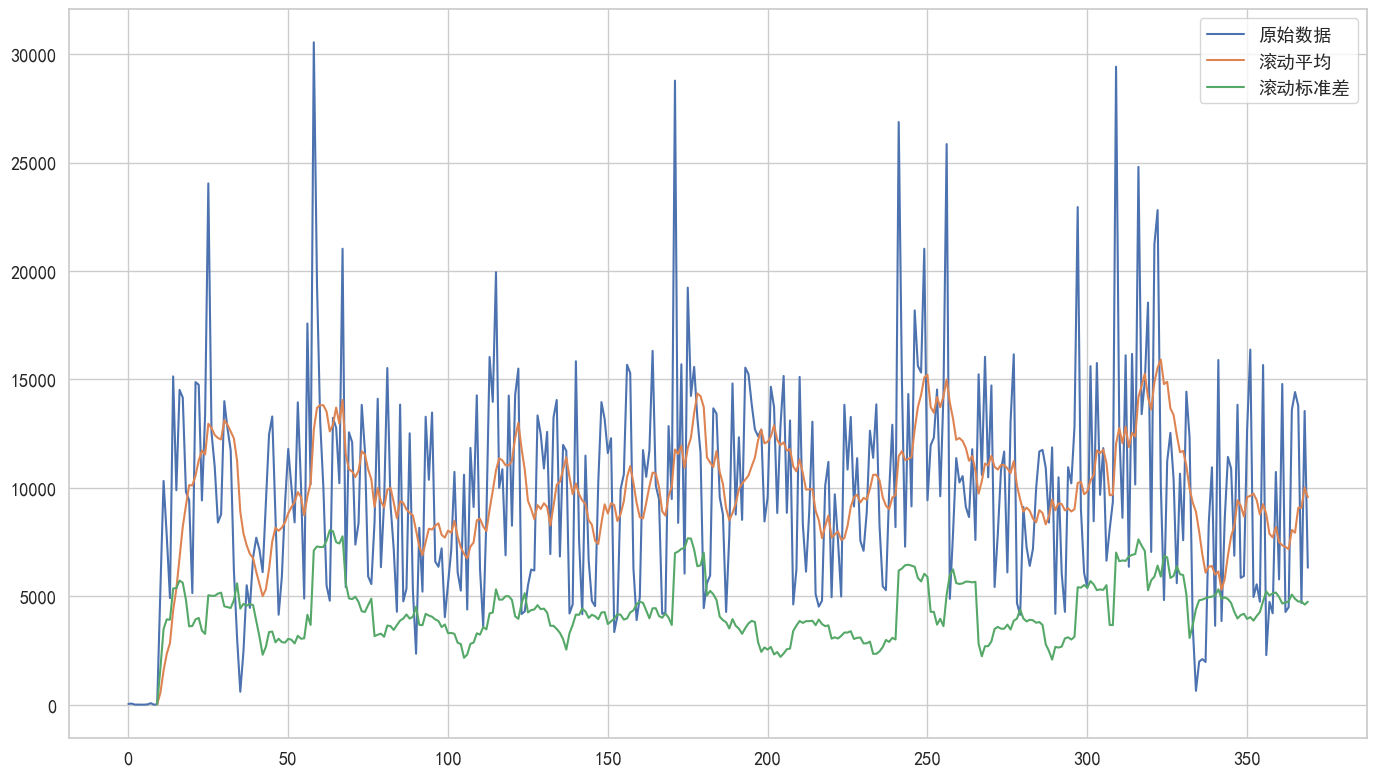

In [54]:
# 滚动统计量

# 读取时间序列数据
data = 需要预测的时间序列值

# 计算滚动平均和滚动标准差
window_size = 10
rolling_mean = data.rolling(window_size).mean()
rolling_std = data.rolling(window_size).std()

# 绘制图形
fig, ax = plt.subplots(figsize=(14, 8))
data.plot(ax=ax, label='原始数据')
rolling_mean.plot(ax=ax, label='滚动平均')
rolling_std.plot(ax=ax, label='滚动标准差')
plt.legend()
plt.tight_layout()
plt.savefig('滚动统计量.svg')
plt.show()
